# Intro

## Librerías

In [1]:
# Data
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

# Redes Neuronales
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Import/Export
import pickle
import joblib

## Representación Gráfica

### Pruebas

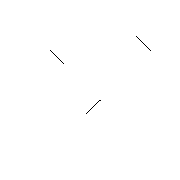

In [2]:
def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth in antennas:
        # Origen del vector
        origin = (x, y)

        # Calcular el desplazamiento en x e y basado en el ángulo y la atenuación
        dx = math.cos(math.radians(azimuth))
        dy = math.sin(math.radians(azimuth))

        # Dibujar el vector desde la antena hasta el límite definido por la atenuación
        for i in range(attenuation):
            # Calcular las coordenadas del punto a lo largo del vector
            px = int(x + dx * i)
            py = int(y + dy * i)

            # Asegurarse de que las coordenadas estén dentro de la imagen
            if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                # Colorear el píxel en escala de grises
                gray_image[py, px] = 0  # Negro
                # Puedes ajustar el valor (0) para obtener diferentes tonos de gris

    return gray_image

# Definir las coordenadas de las antenas y sus direcciones de azimuth
antennas = [((50, 50), 45), ((100, 100), 135), ((150, 50), 225)]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 20  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


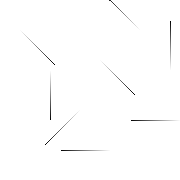

In [3]:
def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth in antennas:
        # Origen del vector
        origin = (x, y)

        # Calcular el desplazamiento en x e y basado en el ángulo y la atenuación
        dx = math.cos(math.radians(azimuth))
        dy = math.sin(math.radians(azimuth))

        # Dibujar el vector desde la antena hasta el límite definido por la atenuación
        for i in range(attenuation):
            # Calcular las coordenadas del punto a lo largo del vector
            px = int(x + dx * i)
            py = int(y + dy * i)

            # Asegurarse de que las coordenadas estén dentro de la imagen
            if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                # Calcular la intensidad del píxel basada en la distancia al origen de la antena
                intensity = int(255 * (1 - i / attenuation))  # Atenuación gradual

                # Colorear el píxel en escala de grises
                gray_image[py, px] = intensity

    return gray_image

# Definir las coordenadas de las antenas y sus direcciones de azimuth

antennas = [
    ((20, 30), 45),   # Antena 1
    ((50, 70), 90),   # Antena 2
    ((80, 110), 135), # Antena 3
    ((110, 150), 180),# Antena 4
    ((140, 30), 225), # Antena 5
    ((170, 70), 270), # Antena 6
    ((200, 110), 315),# Antena 7
    ((230, 150), 0),  # Antena 8
    ((100, 60), 45),  # Antena 9
    ((180, 120), 180) # Antena 10
]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 50  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


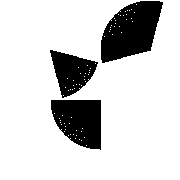

In [4]:
def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth, amplitude in antennas:
        # Dibujar el sector circular para cada antena
        for angle in range(azimuth - amplitude, azimuth + amplitude + 1):
            # Calcular el desplazamiento en x e y basado en el ángulo
            dx = math.cos(math.radians(angle))
            dy = math.sin(math.radians(angle))

            # Dibujar el vector desde la antena hasta el límite definido por la atenuación
            for i in range(attenuation):
                # Calcular las coordenadas del punto a lo largo del vector
                px = int(x + dx * i)
                py = int(y + dy * i)

                # Asegurarse de que las coordenadas estén dentro de la imagen
                if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                    # Colorear el píxel en escala de grises
                    gray_image[py, px] = 0  # Negro
                    # Puedes ajustar el valor (0) para obtener diferentes tonos de gris

    return gray_image

# Definir las coordenadas de las antenas, sus direcciones de azimuth y amplitudes de ángulo
antennas = [
    ((50, 50), 45, 30),   # Antena 1
    ((100, 100), 135, 45),   # Antena 2
    ((150, 50), 225, 60)   # Antena 3
    # Puedes agregar más antenas según sea necesario
]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 50  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


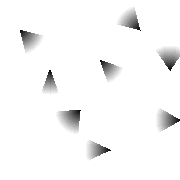

In [5]:
def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth, amplitude in antennas:
        # Dibujar el sector circular para cada antena
        for angle in range(azimuth - amplitude, azimuth + amplitude + 1):
            # Calcular el desplazamiento en x e y basado en el ángulo
            dx = math.cos(math.radians(angle))
            dy = math.sin(math.radians(angle))

            # Dibujar el vector desde la antena hasta el límite definido por la atenuación
            for i in range(attenuation):
                # Calcular las coordenadas del punto a lo largo del vector
                px = int(x + dx * i)
                py = int(y + dy * i)

                # Asegurarse de que las coordenadas estén dentro de la imagen
                if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                    # Calcular la intensidad del píxel basada en la distancia al origen de la antena
                    intensity = int(255 * (i / attenuation))  # Atenuación gradual inversa

                    # Colorear el píxel en escala de grises
                    gray_image[py, px] = intensity

    return gray_image

# Definir las coordenadas de las antenas, sus direcciones de azimuth y amplitudes de ángulo
antennas = [
    ((20, 30), 45, 30),   # Antena 1
    ((50, 70), 90, 20),   # Antena 2
    ((80, 110), 135, 40), # Antena 3
    ((110, 150), 180, 25),# Antena 4
    ((140, 30), 225, 30), # Antena 5
    ((170, 70), 270, 35), # Antena 6
    ((200, 110), 315, 20),# Antena 7
    ((230, 150), 0, 45),  # Antena 8
    ((100, 60), 45, 25),  # Antena 9
    ((180, 120), 180, 30) # Antena 10
]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 25  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


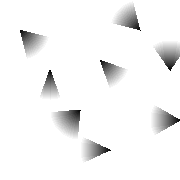

In [6]:
def draw_antennas(image, antenna_data, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Parsear la información de las antenas
    antennas = parse_antennas(antenna_data)

    # Iterar sobre las antenas
    for (x, y), azimuth, amplitude in antennas:
        # Dibujar el sector circular para cada antena
        for angle in range(azimuth - amplitude, azimuth + amplitude + 1):
            # Calcular el desplazamiento en x e y basado en el ángulo
            dx = math.cos(math.radians(angle))
            dy = math.sin(math.radians(angle))

            # Dibujar el vector desde la antena hasta el límite definido por la atenuación
            for i in range(attenuation):
                # Calcular las coordenadas del punto a lo largo del vector
                px = int(x + dx * i)
                py = int(y + dy * i)

                # Asegurarse de que las coordenadas estén dentro de la imagen
                if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                    # Calcular la intensidad del píxel basada en la distancia al origen de la antena
                    intensity = int(255 * (i / attenuation))  # Atenuación gradual inversa

                    # Colorear el píxel en escala de grises
                    gray_image[py, px] = intensity

    return gray_image

def parse_antennas(antenna_list):
    antennas = []
    for i in range(0, len(antenna_list), 4):
        x = antenna_list[i]
        y = antenna_list[i + 1]
        azimuth = antenna_list[i + 2]
        amplitude = antenna_list[i + 3]
        antennas.append(((x, y), azimuth, amplitude))
    return antennas

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Lista de antenas en formato cíclico (x, y, azimuth, amplitud)
antenna_data = [
    20, 30, 45, 30,
    50, 70, 90, 20,
    80, 110, 135, 40,
    110, 150, 180, 25,
    140, 30, 225, 30,
    170, 70, 270, 35,
    200, 110, 315, 20,
    230, 150, 0, 45,
    100, 60, 45, 25,
    180, 120, 180, 30
]

# Definir la atenuación
attenuation = 30  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antenna_data, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)



## Arrays

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_images(image_paths, target_size=(180, 180)):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=target_size)  # Cargar imagen y redimensionar
        img_array = img_to_array(img)  # Convertir imagen a array NumPy
        images.append(img_array)

    # Convertir lista de arrays a un array 4D
    input_data = np.array(images)
    return input_data

# Ejemplo de uso
image_paths = ["path_to_image1.png", "path_to_image2.png", ..., "path_to_image10.png"]
input_data = load_and_preprocess_images(image_paths)

print(input_data.shape)
# Salida esperada: (10, 180, 180, 4)


In [10]:
# Crear un array 3x3x4 con valores específicos para cada canal
image_example = np.array([
    [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]],   # Primera fila
    [[12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23]], # Segunda fila
    [[24, 25, 26, 27], [28, 29, 30, 31], [32, 33, 34, 35]]  # Tercera fila
])

print(image_example.shape)
# Salida esperada: (3, 3, 4)

print(image_example)
# Salida esperada:
# [[[ 0  1  2  3]
#   [ 4  5  6  7]
#   [ 8  9 10 11]]
#
#  [[12 13 14 15]
#   [16 17 18 19]
#   [20 21 22 23]]
#
#  [[24 25 26 27]
#   [28 29 30 31]
#   [32 33 34 35]]]


# Cian (C) Channel:
# [[ 0  4  8]
#  [12 16 20]
#  [24 28 32]]

# Magenta (M) Channel:
# [[ 1  5  9]
#  [13 17 21]
#  [25 29 33]]

# Amarillo (Y) Channel:
# [[ 2  6 10]
#  [14 18 22]
#  [26 30 34]]

# Negro (K) Channel:
# [[ 3  7 11]
#  [15 19 23]
#  [27 31 35]]

(3, 3, 4)
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]]]


In [15]:
import numpy as np

# Crear valores para cada canal
c_channel = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

m_channel = np.array([
    [11, 12, 13],
    [14, 15, 16],
    [17, 18, 19]
])

y_channel = np.array([
    [21, 22, 23],
    [24, 25, 26],
    [27, 28, 29]
])

k_channel = np.array([
    [31, 32, 33],
    [34, 35, 36],
    [37, 38, 39]
])

# Combinar los canales en una sola imagen 3x3x4
image_example = np.stack((c_channel, m_channel, y_channel, k_channel), axis=-1)

print(image_example.shape)
print(image_example)

(3, 3, 4)
[[[ 1 11 21 31]
  [ 2 12 22 32]
  [ 3 13 23 33]]

 [[ 4 14 24 34]
  [ 5 15 25 35]
  [ 6 16 26 36]]

 [[ 7 17 27 37]
  [ 8 18 28 38]
  [ 9 19 29 39]]]


In [16]:
# Definir dos imágenes de ejemplo
image1 = np.array([
    [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]],   # Primera fila
    [[12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23]],  # Segunda fila
    [[24, 25, 26, 27], [28, 29, 30, 31], [32, 33, 34, 35]]   # Tercera fila
])

image2 = np.array([
    [[100, 101, 102, 103], [104, 105, 106, 107], [108, 109, 110, 111]],  # Primera fila
    [[112, 113, 114, 115], [116, 117, 118, 119], [120, 121, 122, 123]],  # Segunda fila
    [[124, 125, 126, 127], [128, 129, 130, 131], [132, 133, 134, 135]]   # Tercera fila
])

# Crear el dataset combinando las dos imágenes
dataset = np.array([image1, image2])

print(dataset.shape)
# Salida esperada: (2, 3, 3, 4)

print(dataset)

(2, 3, 3, 4)
[[[[  0   1   2   3]
   [  4   5   6   7]
   [  8   9  10  11]]

  [[ 12  13  14  15]
   [ 16  17  18  19]
   [ 20  21  22  23]]

  [[ 24  25  26  27]
   [ 28  29  30  31]
   [ 32  33  34  35]]]


 [[[100 101 102 103]
   [104 105 106 107]
   [108 109 110 111]]

  [[112 113 114 115]
   [116 117 118 119]
   [120 121 122 123]]

  [[124 125 126 127]
   [128 129 130 131]
   [132 133 134 135]]]]


# CNN

In [17]:
# Crear dos imágenes de ejemplo con valores aleatorios
image1 = np.random.randint(0, 256, size=(180, 180, 4), dtype=np.uint8)
image2 = np.random.randint(0, 256, size=(180, 180, 4), dtype=np.uint8)

# Crear el dataset combinando las dos imágenes
dataset = np.array([image1, image2])

print(dataset.shape)
# Salida esperada: (2, 180, 180, 4)

# Mostrar una parte del contenido del dataset para verificar la estructura
print(dataset[0, :2, :2, :])  # Mostrar una pequeña porción de la primera imagen


(2, 180, 180, 4)
[[[151 100 254  49]
  [240 145  20   3]]

 [[ 65  78 185 107]
  [159 119 111  16]]]


In [19]:
# Crear etiquetas dummy (por ejemplo, R1, R2, R3 para cada imagen)
labels = np.array([
    [50, 20, 10],  # Etiquetas para la primera imagen
    [40, 15, 7]   # Etiquetas para la segunda imagen
])

In [7]:
def build_model(image_height=180, image_width=180, num_channels=4):
    input_shape = (image_height, image_width, num_channels)
    inputs = Input(shape=input_shape)

    # Primera capa convolucional
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Segunda capa convolucional
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Tercera capa convolucional
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Cuarta capa convolucional
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Capa completamente conectada
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Capa de salida con 3 unidades (R1, R2, R3)
    outputs = Dense(3, activation='linear')(x)

    model = Model(inputs, outputs)

    return model

In [20]:
# Ejemplo de cómo construir el modelo con diferentes parámetros
model = build_model(image_height=180, image_width=180, num_channels=4)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 4)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      1184      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 90, 90, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 64)        0   

In [21]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# Entrenar el modelo
model.fit(dataset, labels, epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 864.5172
Epoch 2/10
1/1 [==============================] - 1s 570ms/step - loss: 1108.9570
Epoch 3/10
1/1 [==============================] - 1s 507ms/step - loss: 522.7142
Epoch 4/10
1/1 [==============================] - 1s 512ms/step - loss: 1077.1577
Epoch 5/10
1/1 [==============================] - 0s 486ms/step - loss: 1219.7446
Epoch 6/10
1/1 [==============================] - 1s 514ms/step - loss: 573.1901
Epoch 7/10
1/1 [==============================] - 1s 502ms/step - loss: 512.9535
Epoch 8/10
1/1 [==============================] - 1s 512ms/step - loss: 1675.8489
Epoch 9/10
1/1 [==============================] - 1s 519ms/step - loss: 1240.0569
Epoch 10/10
1/1 [==============================] - 1s 524ms/step - loss: 1517.7410


In [24]:
# Crear tres imágenes de prueba con valores aleatorios
test_image1 = np.random.randint(0, 256, size=(180, 180, 4), dtype=np.uint8)
test_image2 = np.random.randint(0, 256, size=(180, 180, 4), dtype=np.uint8)
test_image3 = np.random.randint(0, 256, size=(180, 180, 4), dtype=np.uint8)

# Crear el dataset de prueba combinando las tres imágenes
test_dataset = np.array([test_image1, test_image2, test_image3])

print(test_dataset.shape)
# Salida esperada: (3, 180, 180, 4)

# Mostrar una parte del contenido del dataset de prueba para verificar la estructura
print(test_dataset[0, :2, :2, :])  # Mostrar una pequeña porción de la primera imagen de prueba

(3, 180, 180, 4)
[[[ 19 241 161 236]
  [227 225 181  62]]

 [[133 147 180  87]
  [206 254 139  83]]]


In [25]:
# Realizar predicciones con el dataset de prueba
predictions = model.predict(test_dataset)

# Mostrar las predicciones
print(predictions)

1/1 [==============================] - 0s 410ms/step
[[-160.45331   -27.11175   -14.85105 ]
 [-158.05544   -28.564264  -13.943055]
 [-158.1717    -27.177637  -14.160987]]
